In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os
import math

# Data

#### Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Attributes
**price** price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

In [62]:
df = pd.read_csv('diamonds.csv')
print(df.head())
print('--------------------------------------------------------------------------------------')
print('size of data:' ,df.shape)

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
--------------------------------------------------------------------------------------
size of data: (53940, 11)


In [63]:
df.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


# Exploratory Data Analysis

## dropping excess attributes:


In [64]:
df = df.drop('Unnamed: 0' , axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## missing values

In [65]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

## Visialisations

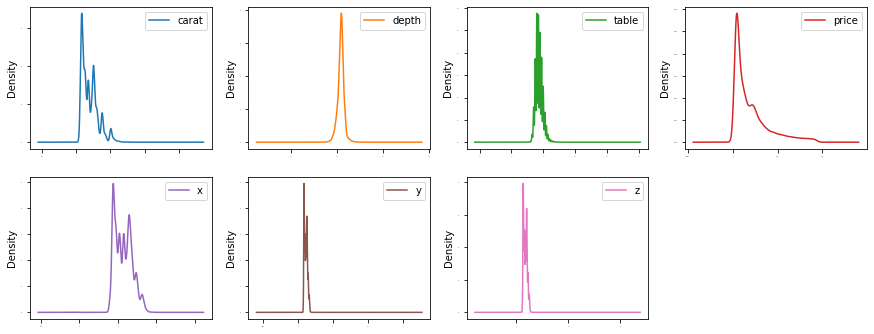

In [66]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

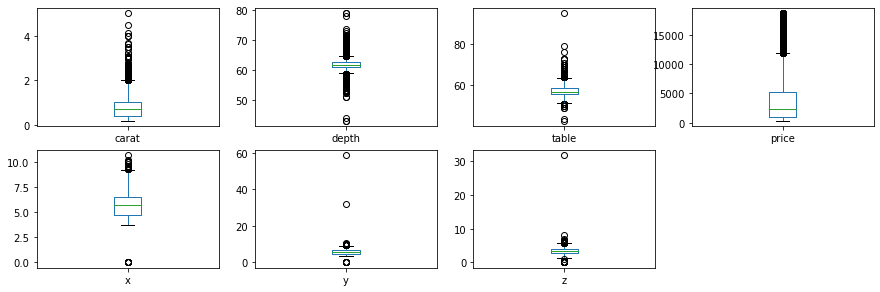

In [67]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

## Data Preprocessing

In [68]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [69]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [70]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [71]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [72]:
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}

In [73]:
df['cut'] = df['cut'].map(cut_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

## splitting data

In [74]:
X= df.drop('price',axis=1)
y = df[['price']]

In [75]:
from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.3
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = test_size, random_state = seed)

In [76]:
X_train.shape,y_train.shape

((37758, 9), (37758, 1))

In [77]:
X_test.shape,y_test.shape

((16182, 9), (16182, 1))

## Data modeling

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

score = []
rmse_val = {}

for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    k=k+1
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))
   
    pred=clf.predict(X_test) #make prediction on test set
    error =(mean_squared_error(y_test,pred))**0.5 #calculate rmse
    
    rmse_val[k] = (error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  2 is: 788.495997837002
RMSE value for k=  3 is: 747.7765242606575
RMSE value for k=  4 is: 726.5789641390608
RMSE value for k=  5 is: 716.7780160797951
RMSE value for k=  6 is: 710.733175923539
RMSE value for k=  7 is: 705.4997723903418
RMSE value for k=  8 is: 703.9489507577464
RMSE value for k=  9 is: 703.2649408264731
RMSE value for k=  10 is: 703.4180753196797
RMSE value for k=  11 is: 705.3640473291961
RMSE value for k=  12 is: 704.9513019771196
RMSE value for k=  13 is: 705.6377350704317
RMSE value for k=  14 is: 705.8754035263747
RMSE value for k=  15 is: 707.5790730010898
RMSE value for k=  16 is: 707.5343512546343
RMSE value for k=  17 is: 707.4118389445578
RMSE value for k=  18 is: 707.8934096542451
RMSE value for k=  19 is: 709.5570011486805
RMSE value for k=  20 is: 710.5541751416778


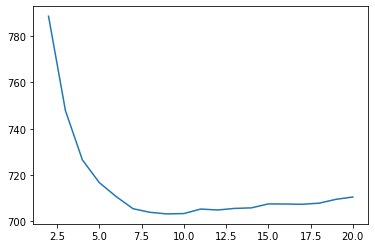

In [109]:
plt.plot(list(rmse_val.keys()) , list(rmse_val.values()));

In [110]:
min(rmse_val, key=rmse_val.get), min(rmse_val.values())

(9, 703.2649408264731)

In [80]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [83]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 9, Max Accuracy = 96.9815895025478


In [84]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.969815895025478
